# UE22CS342AA2: Data Analytics - Worksheet 3a
# Time Series Analysis and Forecasting Techniques

Designed by Anshul Ranjan, Dept.of CSE - itsanshulranjan@gmail.com

## Student Details

• Name:

• SRN:

• Section:

## Air Passengers Analysis
Imagine you're optimizing airline services. \
You've been given a dataset, your task is to analyze monthly trends in air passenger numbers to inform decisions such as route planning, pricing strategies, and enhancing the overall travel experience.

### Contents of the worksheet

It is suggested to have a grip on the theoretical concepts of:

* Components of time series data 
* Decomposition of time series data
* Exponential Smoothing techniques
* Stationary Signals, Dickey-fuller test and Differencing
* Forecasting with AR, MA, ARMA
* Autocorrelation (ACF, PACF) and ARIMA
* Seasonality in Time Series and SARIMA

### Dataset

The data is provided in the AirPassengers.csv file. The data dictionary is as follows:

* Month: The month of the year (formatted as 'YYYY-MM') during which passenger data was collected.
* Passengers: The number of air passengers recorded during that month.

The target variable is **Passengers**, which we shall analyze and forecast in this worksheet. Understanding the trends and patterns in air passenger data is crucial for airline route planning, pricing strategies, capacity management, and enhancing the overall travel experience. Accurately predicting passenger volumes aids in optimizing resources, scheduling, and making informed decisions to meet market demands and improve service quality.

In [1]:
# Load necessary libraries
library(dplyr) 
library(tidyr)  
library(ggplot2) 

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Data Ingestion and Preprocessing
• Reading this file into a data.frame object

In [2]:
# Read the CSV file
df <- read.csv('/kaggle/input/flight-attendees/AirPassengers.csv')

# Display information about the data frame
str(df)

'data.frame':	144 obs. of  2 variables:
 $ Month       : chr  "1949-01" "1949-02" "1949-03" "1949-04" ...
 $ X.Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


In [5]:
head(df)

,Month,X.Passengers
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


The class (data type) of each column in the data frame

In [3]:
sapply(df, class)

Month X.Passengers 
 "character"    "integer"

In [4]:
# Convert 'Month' to Date type
df$Month <- as.Date(paste0(df$Month, "-01"), format="%Y-%m-%d")

# Check the data types of the columns
sapply(df, class)

Month X.Passengers 
      "Date"    "integer"

In [5]:
length(unique(df$Month))

[1] 144

In [6]:
# Rename columns
df <- df %>% rename(value = X.Passengers, month = Month)
head(df)

,month,value
,<date>,<int>
1,1949-01-01,112
2,1949-02-01,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-05-01,121
6,1949-06-01,135


Setting the 'Month' column as the index of the DataFrame to organize the data by time, then plotting the data to visualize the trend in passenger numbers over the given months.

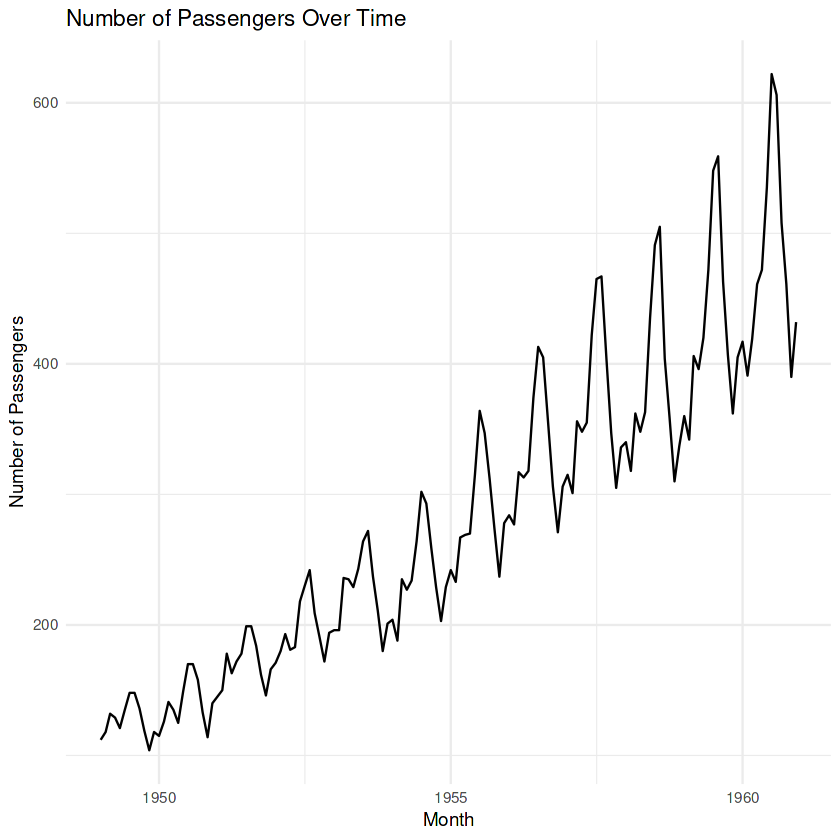

In [7]:
# Set 'month' as the index (not strictly necessary in R but useful for plotting)
df <- df %>% arrange(month)

# Plot the data
ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Number of Passengers Over Time", x = "Month", y = "Number of Passengers") +
  theme_minimal()

Applying a 12-month rolling average to the 'value' column to smooth out short-term fluctuations and highlight longer-term trends, then plotting this smoothed data with 'Date' as the x-axis label for better visualization.


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




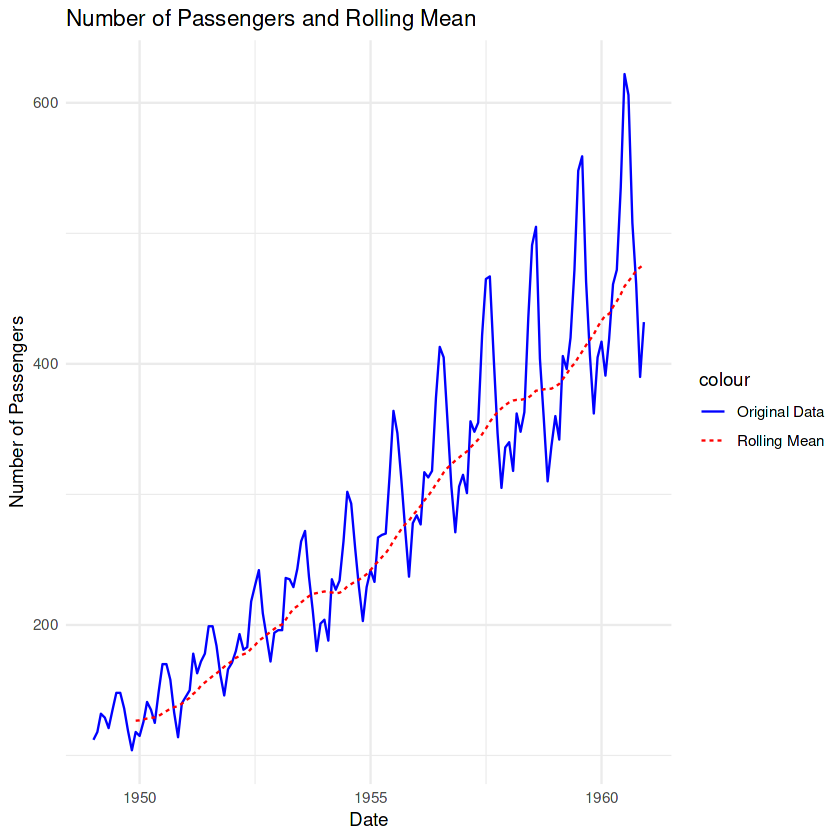

In [8]:
library(zoo)

# Calculate the rolling mean
df$rolling_mean <- rollmean(df$value, k = 12, fill = NA, align = "right")

# Plot the rolling mean
ggplot(df, aes(x = month)) +
  geom_line(aes(y = value, color = "Original Data")) +
  geom_line(aes(y = rolling_mean, color = "Rolling Mean"), linetype = "dashed") +
  labs(title = "Number of Passengers and Rolling Mean",
       x = "Date",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Original Data" = "blue", "Rolling Mean" = "red"))


## Stationarity
• Testing for stationarity \
– We can use the Augmented Dickey-Fuller test (ADF) to test the time series for stationarity

Question 3.1: What are the null hypothesis and alternate hypothesis in this case?

In [ ]:
# Your answer here

# Null Hypothesis (H₀): The time series has a unit root, meaning it is non-stationary. 
# This implies the series has some time-dependent structure or trends. 
# That is there is a treand or seasonality in passengers booking thier tickets for airline 

# Alternative Hypothesis (H₁): The time series is stationary, meaning it does not have a unit root. \
# This suggests that the time series has constant mean, variance, and autocovariance over time. \
# That is, there is no treand or seasonality in passengers booking thier tickets for airline# Your answer here
# Null Hypothesis (H₀): The time series has a unit root, meaning it is non-stationary. 
# This implies the series has some time-dependent structure or trends. 
# That is there is a treand or seasonality in passengers booking thier tickets for airline 

# Alternative Hypothesis (H₁): The time series is stationary, meaning it does not have a unit root. \
# This suggests that the time series has constant mean, variance, and autocovariance over time. \
# That is, there is no treand or seasonality in passengers booking thier tickets for airline

Question 3.2: What are you doing by performing the Augmented Dickey-Fuller (ADF) test on the 'value' column, and how do you interpret the ADF statistic and p-value to determine if the data is stationary?

In [ ]:
# ADF used in testing whether the time series is stationary or non-stationary, i.e., to check if there is any seasonality and trends 

# ADF Statistic: \
# If the ADF statistic is more than the critical value, reject the null hypothesis and conclude that the series is stationary. \
# If the ADF statistic is less than the critical value, then accept the null hypothesis, meaning the series is non-stationary. 

# p-value: \
# If the p-value is below 0.05, reject the null hypothesis, meaning the series is stationary. \
# If the p-value is higher than 0.05, you accept null hypothesis, suggesting the series is non-stationary. 

Question 3.3: Write the code to perform the Augmented Dickey-Fuller (ADF) test on the 'value' column of the DataFrame df to check for stationarity. After running the code, determine whether the data is stationary based on the p-value.

 > Hint : Check the tseries library to perform the test (adf function)
 > * Don't Forget to perform this y <- diffinv(x) before the adf test check the docs here - https://cran.r-project.org/web/packages/tseries/tseries.pdf
 > * https://uribo.github.io/rpkg_showcase/date_and_time/tseries.html
 > * https://rdrr.io/cran/tseries/

In [9]:
library(tseries)
x <- df$value 

# Apply diffinv (invert differencing) to the series
y <- diffinv(x)

adf_test_result <- adf.test(y)

# Print the results of the ADF test
print(adf_test_result)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = 2.6449, Lag order = 5, p-value = 0.99
alternative hypothesis: stationary



In [ ]:
# Since df stat is positive, and much greater than -2.88 (5% significance level: approximately -2.88), so we **accept the null hypothesis** that the data is non-stationary.                                                                                                                                                   
# p value(0.99) is also greater that 0.05, so we accept null hypothesis.

• If the data is not stationary, and if we intend to use a model like ARIMA, the data has to
be transformed. \
• Two most common methods to transform series to stationary are:

* Transformations: eg. log or square root or combinations of these transformations to
stabilize non-constant variance.
* Differencing: subtract current value from previous (with a certain degree)

Check this out for more information, and an implementation in Python!: \
https://www.kaggle.com/code/rdizzl3/time-series-transformations

Question 3.4: Create a new dataframe using suitable differencing order, to convert the data
to stationary time series. 
 > Hint: You can use the same function to confirm the time series is stationary after transformation.

Try to perform first order differencing and observe how the values changes (ADF statistic and p-value), also observe the change in ACF and PACF plots \
Always try to plot the graphs before making the final decision

In [11]:
# Load necessary library
library(tseries)

# Original time series data
x <- df$value  

# Apply first differencing
first_diff <- diff(x, differences = 1)

# Invert differencing 
y <- diffinv(first_diff)

# Perform the ADF test on the first differenced series
adf_test_result <- adf.test(first_diff)

# Print the results of the ADF test for the differenced series
cat("ADF Test for First Differenced Series:\n")
print(adf_test_result)


# Optionally, print the inverted differenced series to see the raw level
cat("\nFirst few rows of the raw level:\n")
print(head(y))

# Optionally, print the first few rows of the differenced data
cat("\nFirst few rows of the differenced series:\n")
print(head(first_diff))

ADF Test for First Differenced Series:

	Augmented Dickey-Fuller Test

data:  first_diff
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


First few rows of the raw level:
[1]  0  6 20 17  9 23

First few rows of the differenced series:
[1]  6 14 -3 -8 14 13


## Autocorrelation Analysis
• We will experiment and plot two functions: 
* **ACF (Autocorrelation function)**: The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number
of periods or units.
* **PACF (Partial Autocorrelation function)**: Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables.

ADF Test for Original Series (Inverted):

	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = 2.6449, Lag order = 5, p-value = 0.99
alternative hypothesis: stationary


ADF Test for First Differenced Series:

	Augmented Dickey-Fuller Test

data:  first_diff
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



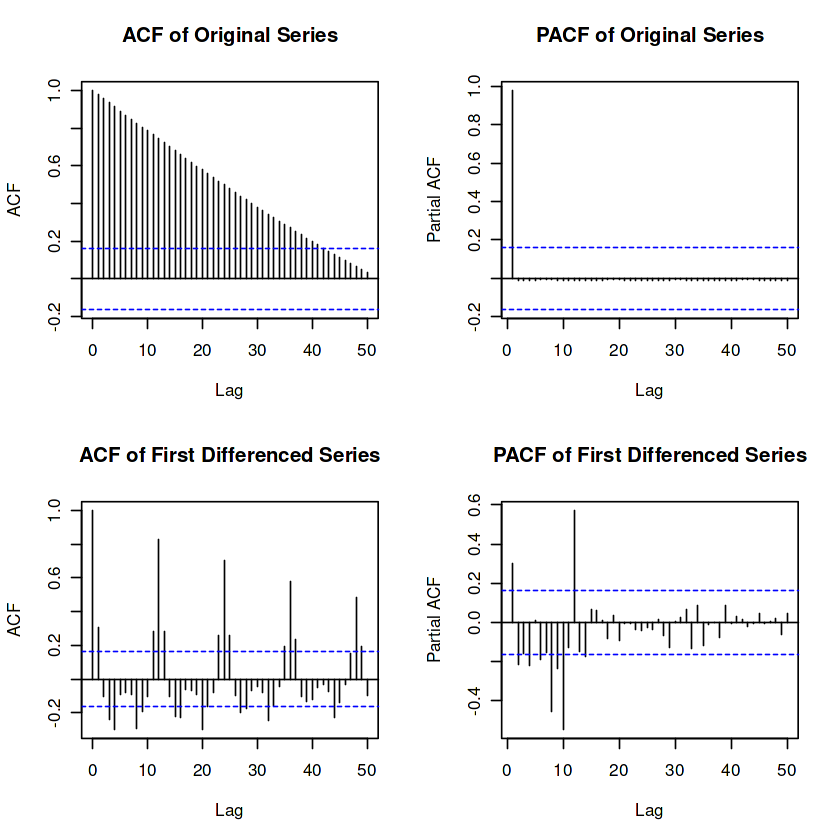

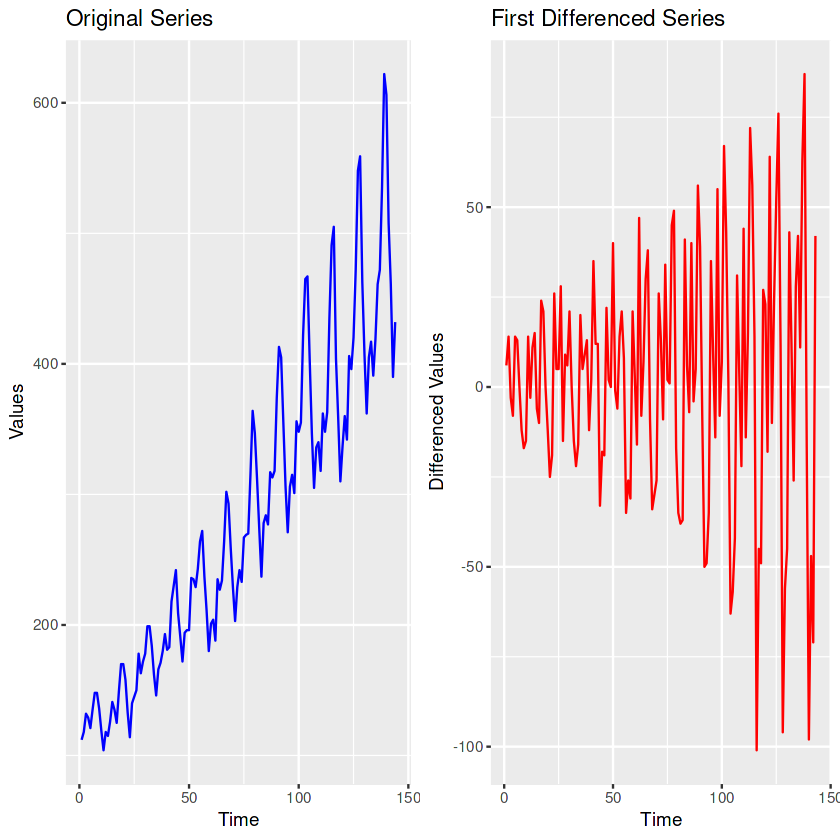

In [13]:
# Load necessary libraries
library(tseries)  # For adf.test
library(ggplot2)  # For ggplot
library(gridExtra)  # For arranging plots

x <- df$value  

first_diff <- diff(x, differences = 1)

y <- diffinv(x)

adf_test_result_original <- adf.test(y)  
adf_test_result_first_diff <- adf.test(first_diff) 

# Print the ADF test results
cat("ADF Test for Original Series (Inverted):\n")
print(adf_test_result_original)
cat("\nADF Test for First Differenced Series:\n")
print(adf_test_result_first_diff)

par(mfrow = c(2, 2))  # Set up the plotting area

# ACF and PACF for Original Series
acf(y,lag.max = 50, main = "ACF of Original Series")
pacf(y, lag.max=50,  main = "PACF of Original Series")

# ACF and PACF for Differenced Series
acf(first_diff, lag.max = 50,  main = "ACF of First Differenced Series")
pacf(first_diff,lag.max = 50,  main = "PACF of First Differenced Series")

original_plot <- ggplot(data.frame(Time = seq_along(x), Value = x), aes(x = Time, y = Value)) +
  geom_line(color = "blue") + 
  ggtitle("Original Series") + 
  xlab("Time") + 
  ylab("Values")

differenced_plot <- ggplot(data.frame(Time = seq_along(first_diff), Value = first_diff), aes(x = Time, y = Value)) +
  geom_line(color = "red") + 
  ggtitle("First Differenced Series") + 
  xlab("Time") + 
  ylab("Differenced Values")

# Arrange the plots
grid.arrange(original_plot, differenced_plot, ncol = 2)


Question 3.5 : What are the values of p, q and d? How did you come to this conclusion,
looking at the ACF, PACF plots? \
> Hint: The value of d is decided by the order of differencing, as transformed in the previous
section.

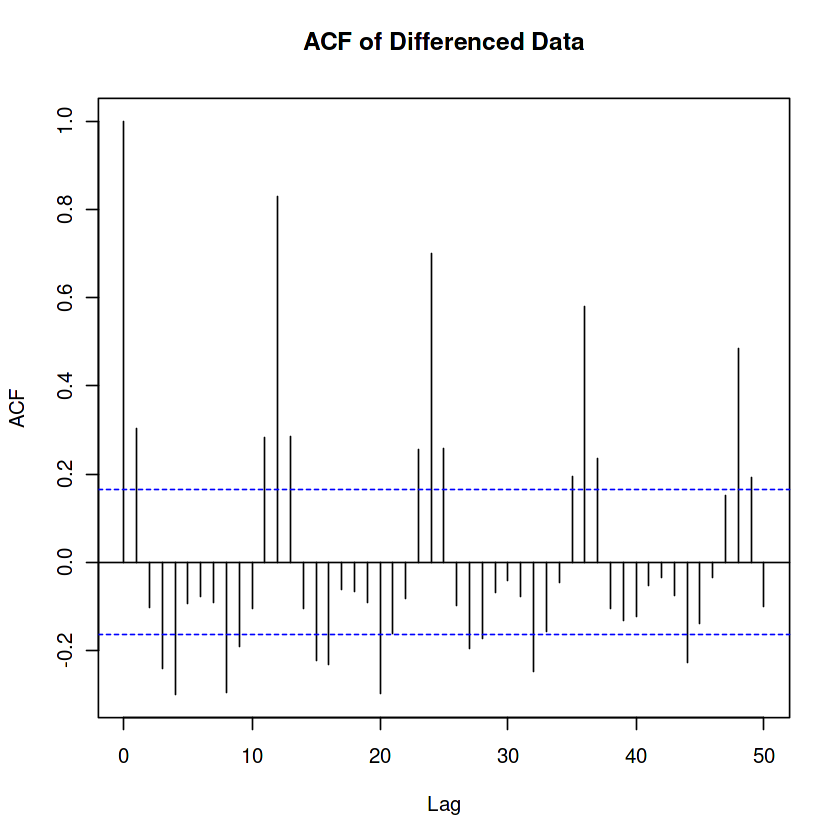

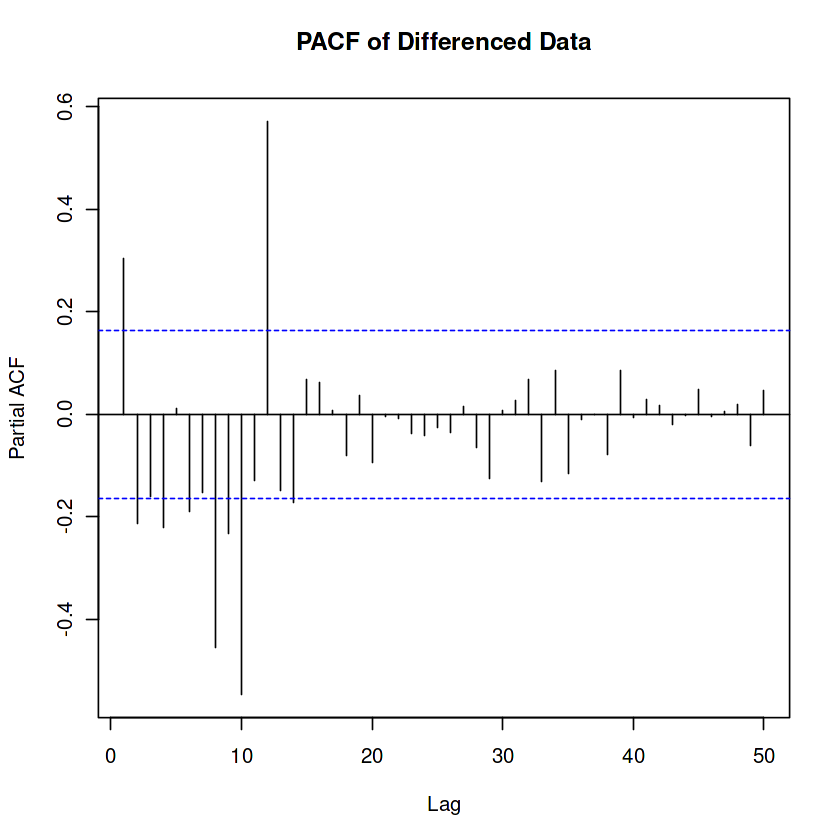

In [15]:
library(stats)

# Compute and plot ACF
acf_result <- acf(first_diff, lag.max = 50, main = "ACF of Differenced Data")

# Compute and plot PACF
pacf_result <- pacf(first_diff, lag.max = 50, main = "PACF of Differenced Data")

## Decomposition

Question 3.6: 
1. Decompose the **value** column into the constituent components, and plot them. 
2. Which model of time series did you use for decomposition, and why? (between additive and multiplicative models)

> Hint: The data is Sesonal, Look at the decompose function in stats library.

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


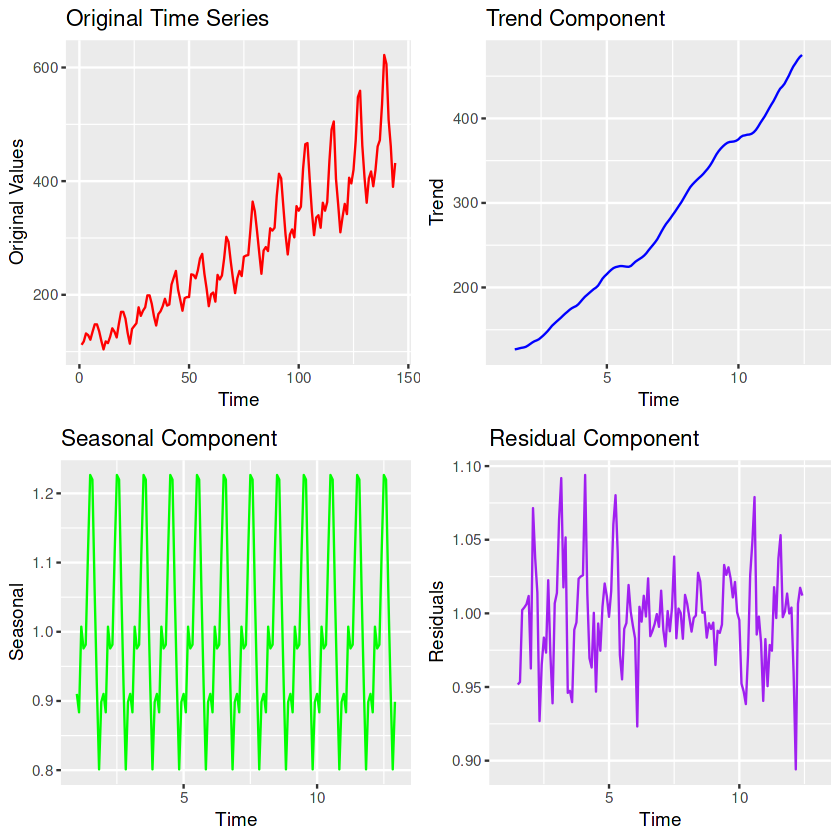

In [16]:
# Load necessary libraries
library(ggplot2)
library(gridExtra)

x <- df$value 

original_ts <- ts(x, frequency = 12)

decomposed_multiplicative <- decompose(original_ts, type = "multiplicative")

trend_df <- data.frame(Time = as.numeric(time(decomposed_multiplicative$trend)),
                       Value = decomposed_multiplicative$trend)
seasonal_df <- data.frame(Time = as.numeric(time(decomposed_multiplicative$seasonal)),
                          Value = decomposed_multiplicative$seasonal)
residual_df <- data.frame(Time = as.numeric(time(decomposed_multiplicative$random)),
                          Value = decomposed_multiplicative$random)
original_df <- data.frame(Time = seq_along(x), 
                          Value = x)

# Original Series plot
original_plot <- ggplot(original_df, aes(x = Time, y = Value)) +
  geom_line(color = "red") + 
  ggtitle("Original Time Series") + 
  xlab("Time") + 
  ylab("Original Values")

# Trend plot
trend_plot <- ggplot(trend_df, aes(x = Time, y = Value)) +
  geom_line(color = "blue") +
  ggtitle("Trend Component") +
  xlab("Time") +
  ylab("Trend")

# Seasonal plot
seasonal_plot <- ggplot(seasonal_df, aes(x = Time, y = Value)) +
  geom_line(color = "green") +
  ggtitle("Seasonal Component") +
  xlab("Time") +
  ylab("Seasonal")

# Residual plot
residual_plot <- ggplot(residual_df, aes(x = Time, y = Value)) +
  geom_line(color = "purple") +
  ggtitle("Residual Component") +
  xlab("Time") +
  ylab("Residuals")

grid.arrange(original_plot, trend_plot, seasonal_plot, residual_plot, ncol = 2)


Note: Sometimes, we look at upsampling or downsampling the data. For instance, if we
have sensor data for each second, we might not need such granular data, and we
downsample the data to daily data or hourly data or so.
Explore further here: https://machinelearningmastery.com/resample-interpolatetime-series-data-python/

You can also explore adding the decomposed versions of each feature (column) to your data, and utilize it
as exogenous variables for multivariate forecasting! This would require you to decompose all features, such
as temperature, rainfall, etc. as well, which is out of scope of this worksheet.

## Exponential Smoothing

Question 3.7:

• Perform forecasts using Single, Double and Triple Exponential Smoothing. \
• Plot forecasts of all three forecasts (using different colors), against the true values. (Use lines) \
• Only one function needed for all three forecasts, only requiring you to change the parameters to get each of the 3 models. \
• Hint: look at the ExponentialSmoothing function \
• Go ahead, and experiment with the values of alpha, beta and gamma and see how the forecast changes.

> Hint: Use the forecast library

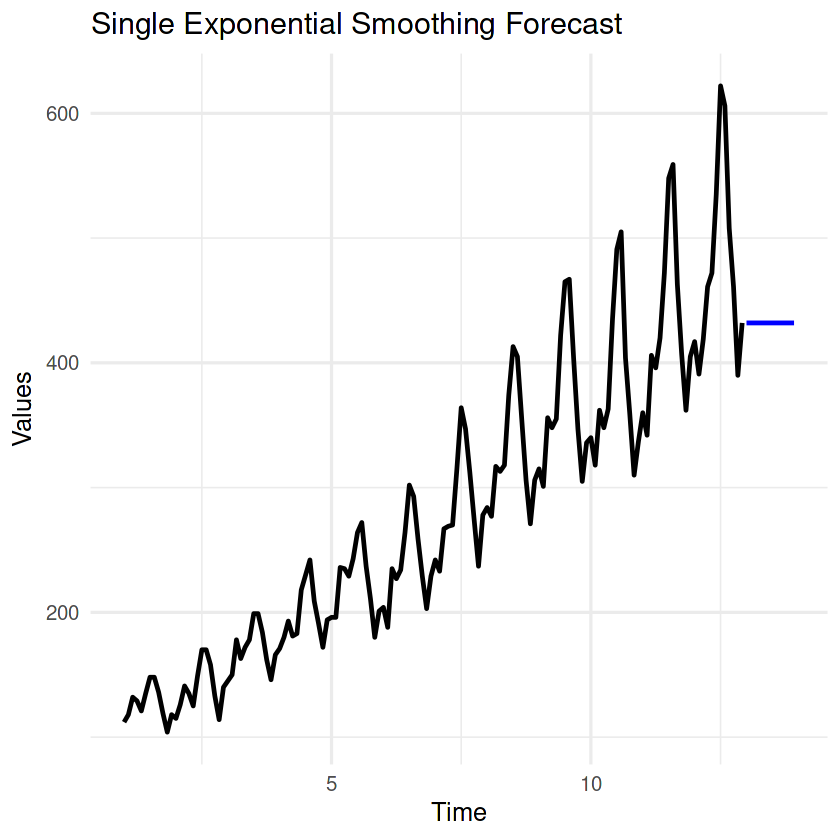

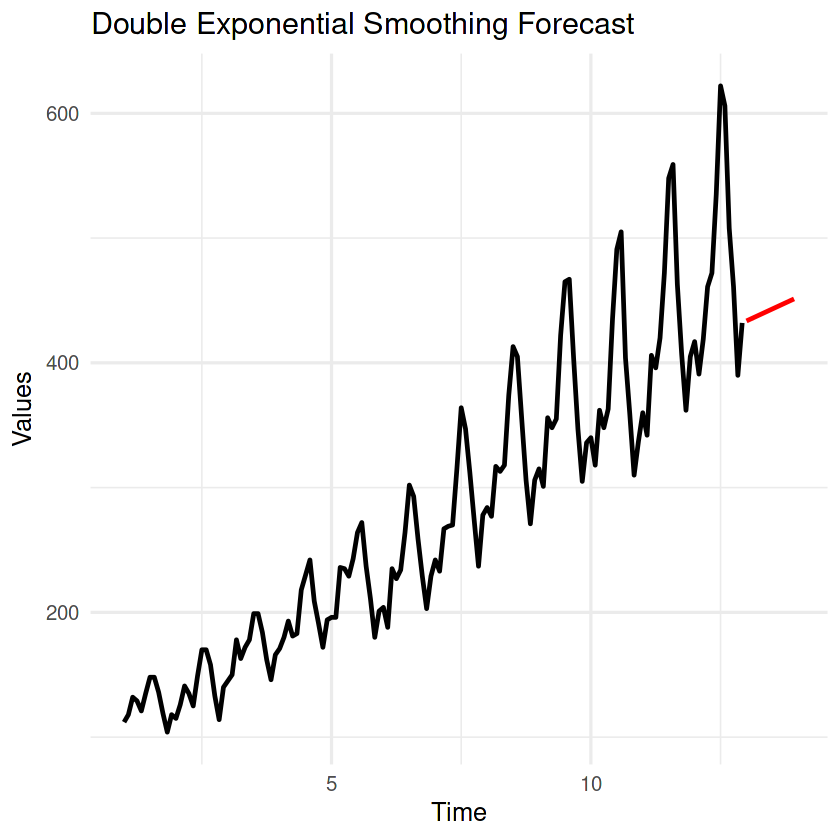

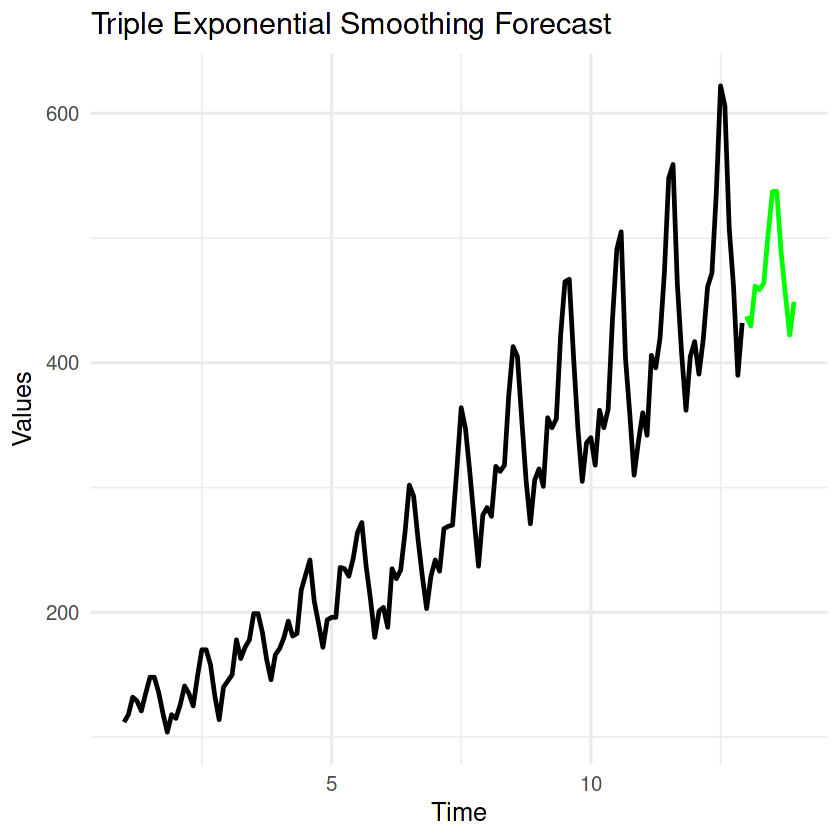

In [17]:
# Load necessary libraries
library(forecast)
library(ggplot2)

x <- df$value
ts_data <- ts(x, frequency = 12)

single_model <- ets(ts_data, model = "ANN")  # Single Exponential Smoothing
double_model <- ets(ts_data, model = "AAN")  # Double Exponential Smoothing
triple_model <- ets(ts_data, model = "AAA")  # Triple Exponential Smoothing (automatically estimates parameters)

forecast_periods <- 12  # Forecast 12 periods ahead
single_forecast <- forecast(single_model, h = forecast_periods)
double_forecast <- forecast(double_model, h = forecast_periods)

if (exists("triple_model")) {
  triple_forecast <- forecast(triple_model, h = forecast_periods)
  
  true_values <- data.frame(Time = as.numeric(time(ts_data)), Value = as.numeric(ts_data))

  single_forecast_df <- data.frame(Time = as.numeric(time(single_forecast$mean)),
                                   Value = as.numeric(single_forecast$mean),
                                   Method = "Single")

  double_forecast_df <- data.frame(Time = as.numeric(time(double_forecast$mean)),
                                   Value = as.numeric(double_forecast$mean),
                                   Method = "Double")

  triple_forecast_df <- data.frame(Time = as.numeric(time(triple_forecast$mean)),
                                   Value = as.numeric(triple_forecast$mean),
                                   Method = "Triple")

  # Plot for Single Exponential Smoothing
  single_plot <- ggplot() +
    geom_line(data = true_values, aes(x = Time, y = Value), color = "black", size = 1) +
    geom_line(data = single_forecast_df, aes(x = Time, y = Value), color = "blue", size = 1) +
    ggtitle("Single Exponential Smoothing Forecast") +
    xlab("Time") + ylab("Values") +
    theme_minimal(base_size = 15)  # You can adjust 'base_size' to change font size

  # Plot for Double Exponential Smoothing
  double_plot <- ggplot() +
    geom_line(data = true_values, aes(x = Time, y = Value), color = "black", size = 1) +
    geom_line(data = double_forecast_df, aes(x = Time, y = Value), color = "red", size = 1) +
    ggtitle("Double Exponential Smoothing Forecast") +
    xlab("Time") + ylab("Values") +
    theme_minimal(base_size = 15)

  # Plot for Triple Exponential Smoothing
  triple_plot <- ggplot() +
    geom_line(data = true_values, aes(x = Time, y = Value), color = "black", size = 1) +
    geom_line(data = triple_forecast_df, aes(x = Time, y = Value), color = "green", size = 1) +
    ggtitle("Triple Exponential Smoothing Forecast") +
    xlab("Time") + ylab("Values") +
    theme_minimal(base_size = 15)
    
  print(single_plot)  # Plot Single Exponential Smoothing
  print(double_plot)  # Plot Double Exponential Smoothing
  print(triple_plot)  # Plot Triple Exponential Smoothing
} else {
  cat("Triple Exponential Smoothing model could not be fitted.\n")
}

In [19]:
library(Metrics)

# Define the function to calculate metrics
calculate_metrics <- function(actual_values, predicted_values) {
  mae_value <- mae(actual_values, predicted_values)
  mse_value <- mse(actual_values, predicted_values)
  rmse_value <- rmse(actual_values, predicted_values)
  mape_value <- mean(abs((actual_values - predicted_values) / actual_values)) * 100
  
  return(list(MAE = mae_value, MAPE = mape_value, MSE = mse_value, RMSE = rmse_value))
}

# Generate some example data and forecasts (replace with your actual data and forecasts)
# For demonstration purposes, assuming `df` contains the actual values and the forecasts are for the next 12 periods
forecast_periods <- 12
actual_values <- tail(df$value, forecast_periods)

# Get forecasts as numeric values from your fitted models
forecast_single <- as.numeric(single_forecast$mean)
forecast_double <- as.numeric(double_forecast$mean)
forecast_triple <- as.numeric(triple_forecast$mean)

# Calculate metrics for each model's forecast
single_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = forecast_single)
double_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = forecast_double)
triple_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = forecast_triple)

# Print the metrics
cat("Single Exponential Smoothing Metrics:\n")
print(single_metrics)

cat("\nDouble Exponential Smoothing Metrics:\n")
print(double_metrics)

cat("\nTriple Exponential Smoothing Metrics:\n")
print(triple_metrics)


Single Exponential Smoothing Metrics:
$MAE
[1] 62.66807

$MAPE
[1] 11.87382

$MSE
[1] 7490.538

$RMSE
[1] 86.5479


Double Exponential Smoothing Metrics:
$MAE
[1] 59.99325

$MAPE
[1] 11.55687

$MSE
[1] 6551.687

$RMSE
[1] 80.94249


Triple Exponential Smoothing Metrics:
$MAE
[1] 30.96504

$MAPE
[1] 6.277066

$MSE
[1] 1532.807

$RMSE
[1] 39.15108



Question 3.8: Compare accuracy metrics (MAE, MAPE, MSE, RMSE) of the three models with the original series.

In [20]:
# Load necessary libraries
library(Metrics)

# Define the function to calculate metrics
calculate_metrics <- function(actual_values, predicted_values) {
  mae_value <- mae(actual_values, predicted_values)
  mse_value <- mse(actual_values, predicted_values)
  rmse_value <- rmse(actual_values, predicted_values)
  mape_value <- mean(abs((actual_values - predicted_values) / actual_values)) * 100
  
  return(list(MAE = mae_value, MAPE = mape_value, MSE = mse_value, RMSE = rmse_value))
}

# Set forecast period
forecast_periods <- 12

# Extract actual values for the forecast period (last 12 values of the original data)
actual_values <- tail(df$value, forecast_periods)

# Get forecasts as numeric values from your fitted models
forecast_single <- as.numeric(single_forecast$mean)
forecast_double <- as.numeric(double_forecast$mean)
forecast_triple <- as.numeric(triple_forecast$mean)

# Calculate metrics for each model's forecast
single_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = forecast_single)
double_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = forecast_double)
triple_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = forecast_triple)

# Calculate metrics for the original series
# Using the actual values as predictions since it's the original series
original_metrics <- calculate_metrics(actual_values = actual_values, predicted_values = df$value)

# Combine all metrics into a single data frame for comparison
metrics_comparison <- data.frame(
  Model = c("Original Series", "Single Exponential Smoothing", "Double Exponential Smoothing", "Triple Exponential Smoothing"),
  MAE = c(original_metrics$MAE, single_metrics$MAE, double_metrics$MAE, triple_metrics$MAE),
  MAPE = c(original_metrics$MAPE, single_metrics$MAPE, double_metrics$MAPE, triple_metrics$MAPE),
  MSE = c(original_metrics$MSE, single_metrics$MSE, double_metrics$MSE, triple_metrics$MSE),
  RMSE = c( original_metrics$RMSE, single_metrics$RMSE, double_metrics$RMSE, triple_metrics$RMSE)
)

# Print the comparison metrics
print(metrics_comparison)

                         Model       MAE      MAPE       MSE      RMSE
1              Original Series 195.86806 40.964567 52501.382 229.13180
2 Single Exponential Smoothing  62.66807 11.873817  7490.538  86.54790
3 Double Exponential Smoothing  59.99325 11.556869  6551.687  80.94249
4 Triple Exponential Smoothing  30.96504  6.277066  1532.807  39.15108


## Time Series Forecasting using Statistical Models

• Before we apply models for forecasting, we need to create a training and validation/test set, as would
be the procedure for most machine learning problems. \
• However, one thing to keep in mind while performing this split for time series data: NEVER perform
a random split.

Question 3.9: Why do you think we shouldn’t perform a random split on our data to create a train/test/dev set?

In [ ]:
# # Your answer hereInherent Time Dependency: Time series data is inherently ordered by time, and observations are dependent on previous ones. Randomly shuffling the data breaks this temporal structure, leading to misleading results because future data points may be used to predict past data points.                                                                                                                                                       

# Seasonal Patterns: Time series data often exhibits seasonal trends. Randomly splitting the data may disrupt these patterns, making it difficult for models to learn from the data effectively.                                                                                                                                                         

# Trends: Trends in the data can also be obscured by random splitting, leading to poor model performance because the model might not capture the underlying behavior of the data.

Question 3.10: Implement AR, MA and ARMA models, with the optimal values of p and q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

> Hint: Look at ARMA function in forecast library

In [21]:
library(tsibble)
library(rsample)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: ‘tsibble’


The following object is masked from ‘package:zoo’:

    index


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [23]:
df_tsibble <- df %>% 
  as_tsibble(index = month) 

In [24]:
# Define the number of splits and sizes
n_splits <- 2
train_size <- 100
test_size <- 40

# Initialize Time Series Split
ts_split <- rolling_origin(df_tsibble, 
                           initial = train_size, 
                           assess = test_size,
                           skip = 1) 

# Create a list to store splits
splits <- list()

# Perform the split
for (split in ts_split$splits) {
  train <- analysis(split)
  test <- assessment(split)
  splits <- append(splits, list(list(train = train, test = test)))
}

# Extract the first (and only) train-test split
first_split <- splits[[1]]
train <- first_split$train
test <- first_split$test

Example:  
ar_model <- Arima(train, order = c(p, 0, 0)) \
ar_forecast <- forecast(ar_model, h = length(test_ts))

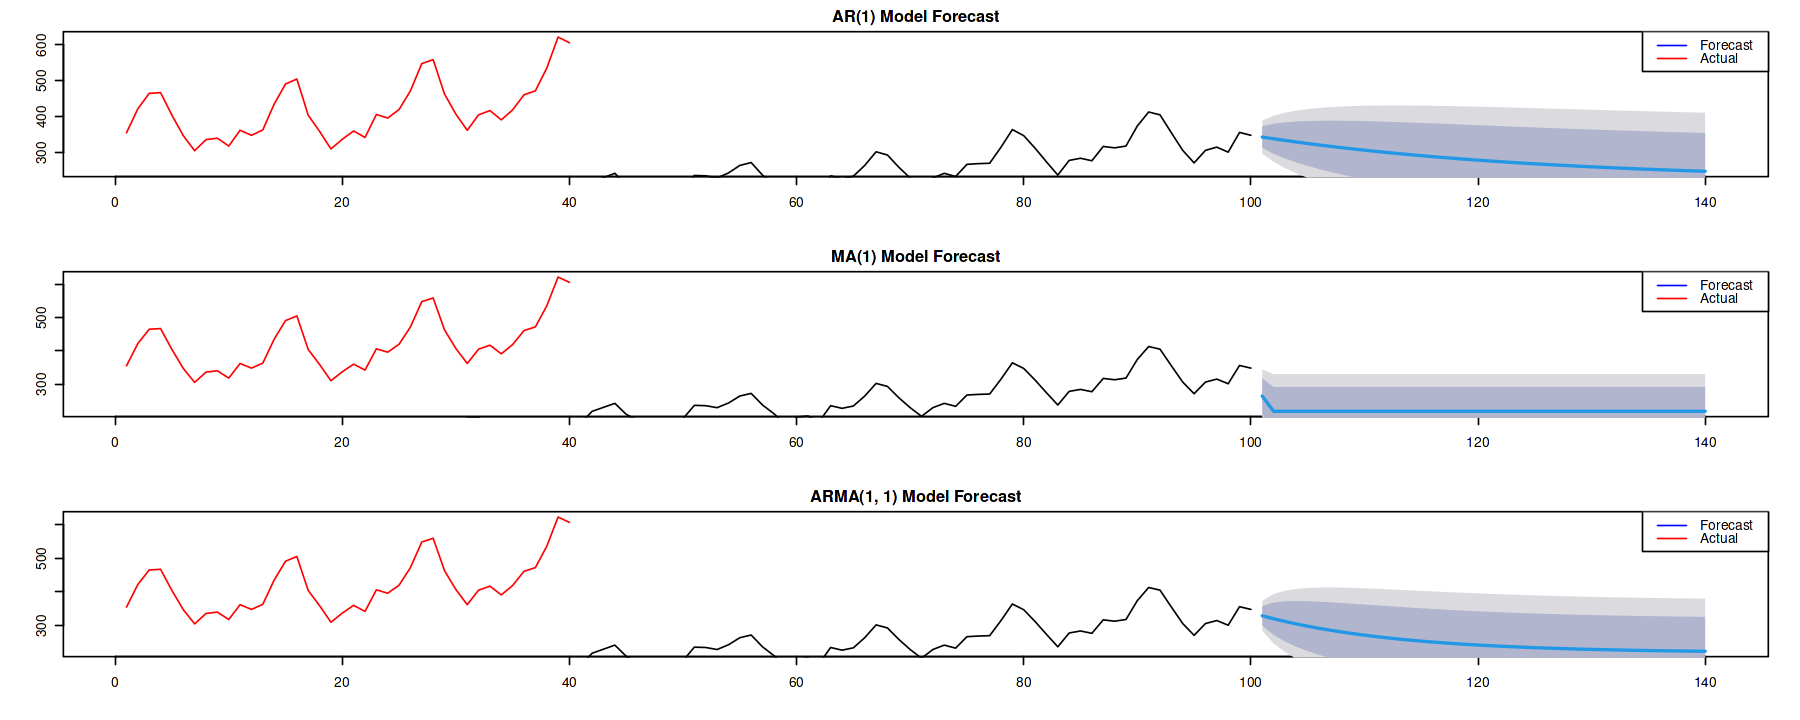

In [26]:
train_ts <- train$value
test_ts <- test$value

# Fit AR(1) model
ar_model <- Arima(train_ts, order = c(1, 0, 0))

# Forecast for the test period
ar_forecast <- forecast(ar_model, h = length(test_ts))

# Fit MA(1) model
ma_model <- Arima(train_ts, order = c(0, 0, 1))

# Forecast for the test period
ma_forecast <- forecast(ma_model, h = length(test_ts))

# Fit ARMA(1, 1) model
arma_model <- Arima(train_ts, order = c(1, 0, 1))

# Forecast for the test period
arma_forecast <- forecast(arma_model, h = length(test_ts))


# --- Plotting Section ---

# Adjust the plot size and margins (in RStudio or base R environments)
par(mfrow = c(3, 1), mar = c(4, 4, 2, 2))  # 3 rows of plots, adjust margins

# Plot AR(1) forecast vs actual values

options(repr.plot.width=15, repr.plot.height=6)
plot(ar_forecast, main = "AR(1) Model Forecast", ylim = range(c(test_ts, ar_forecast$mean)))
lines(test_ts, col = "red")
legend("topright", legend = c("Forecast", "Actual"), col = c("blue", "red"), lty = 1)

# Plot MA(2) forecast vs actual values
plot(ma_forecast, main = "MA(1) Model Forecast", ylim = range(c(test_ts, ma_forecast$mean)))
lines(test_ts, col = "red")
legend("topright", legend = c("Forecast", "Actual"), col = c("blue", "red"), lty = 1)

# Plot ARMA(1, 2) forecast vs actual values
plot(arma_forecast, main = "ARMA(1, 1) Model Forecast", ylim = range(c(test_ts, arma_forecast$mean)))
lines(test_ts, col = "red")
legend("topright", legend = c("Forecast", "Actual"), col = c("blue", "red"), lty = 1)
# Your answer here

Question 3.11 : Implement the ARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

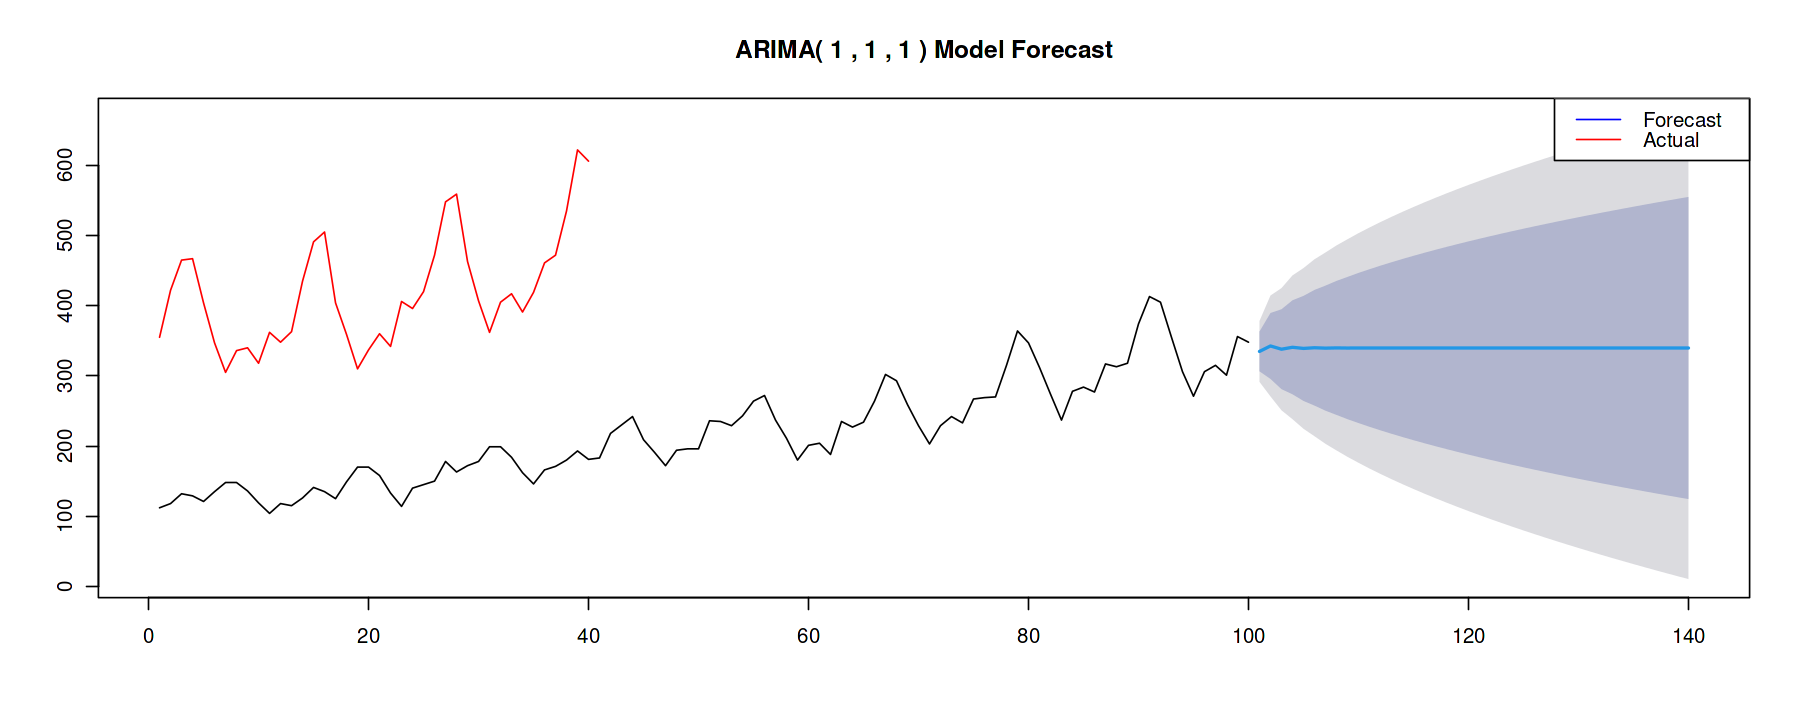

In [27]:
# Load necessary library
library(forecast)

# Fit the ARIMA model with the optimal values of p, d, q
p <- 1  
d <- 1  
q <- 1  
arima_model <- Arima(train_ts, order = c(p, d, q))

# Forecast for the test period
arima_forecast <- forecast(arima_model, h = length(test_ts))

# Adjust plot size before plotting (width = 10 inches, height = 6 inches)
options(repr.plot.width=15, repr.plot.height=6)

# Plot the forecast vs true values
plot(arima_forecast, main = paste("ARIMA(", p, ",", d, ",", q, ") Model Forecast"))
lines(test_ts, col = "red")  
legend("topright", legend = c("Forecast", "Actual"), col = c("blue", "red"), lty = 1)


Question 3.11: 

1. Which models performed better? The exponential smoothing models, or the statistical models (AR, MA, ARMA, ARIMA). Why? 
2. Is this always the case? 
3. Do you think you’d get a better result if you used SARIMA? 

In [ ]:
# 1. Exponential smoothing (Triple Exponential Smoothing Forecast) performed better as it was considering seasonality, whereas AR, MA, ARMA were not considering the seasonaity 
# 2. No, if there was no seasonality, AR, MA, ARMA might perform better
# 3. Yes, SARIMA considers seasonality, so it would perform better

## SARIMA

Question 3.12: Implement the SARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Use Seasonal Order=(2, 1, 0, 12) \
Plot the graph between forecasts and true values.

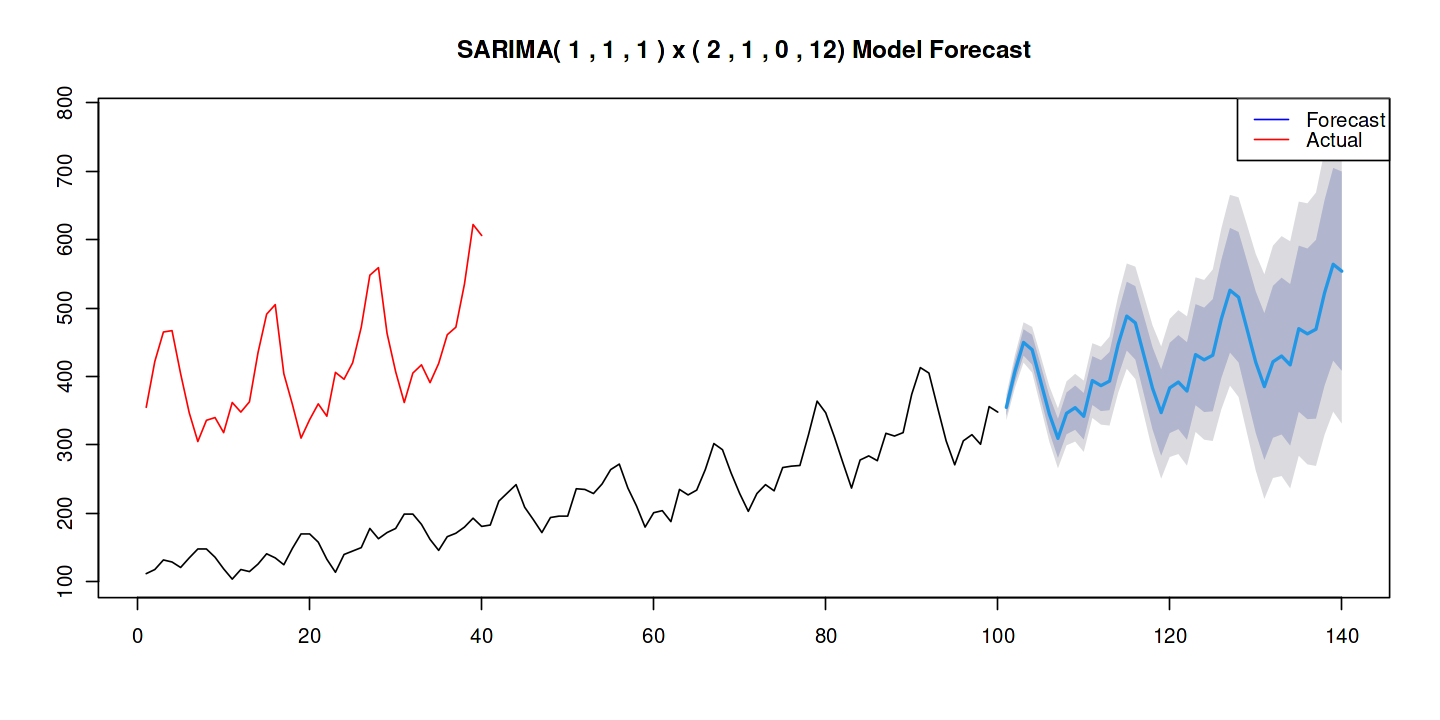

In [28]:
# Load necessary library
library(forecast)

# Fit the SARIMA model with the given seasonal order (2, 1, 0, 12)
p <- 1  
d <- 1  
q <- 1  

# Seasonal order (P, D, Q, S) = (2, 1, 0, 12)
seasonal_order <- c(2, 1, 0)

# Fit the SARIMA model
sarima_model <- Arima(train_ts, order = c(p, d, q), 
                      seasonal = list(order = seasonal_order, period = 12))

# Forecast for the test period
sarima_forecast <- forecast(sarima_model, h = length(test_ts))

# Adjust plot size (increase width to avoid cutoff)
options(repr.plot.width=12, repr.plot.height=6)

# Plot the forecast vs true values
plot(sarima_forecast, main = paste("SARIMA(", p, ",", d, ",", q, ") x (", 
                                   seasonal_order[1], ",", seasonal_order[2], ",", seasonal_order[3], ", 12) Model Forecast"))
lines(test_ts, col = "red")  # Add actual test data in red
legend("topright", legend = c("Forecast", "Actual"), col = c("blue", "red"), lty = 1)



## Making Predictions

You have implemented multiple forecasting models, including ARIMA, SARIMA, and Exponential Smoothing, now select the **best model** and generate forecasts for the period following the training data, from the end of the training set to the end of the entire dataset.

Replace **selected_model** with the variable name of the best-performing model you have chosen. \
Note: Ensure that selected_model is replaced with the actual model variable you have selected after fitting and evaluating your models. This code will generate and plot forecasts using the chosen model, allowing you to compare them against the actual values from the test dataset.

In [29]:
summary(triple_model)

ETS(A,A,A) 

Call:
ets(y = ts_data, model = "AAA")

  Smoothing parameters:
    alpha = 0.9935 
    beta  = 2e-04 
    gamma = 6e-04 

  Initial states:
    l = 120.9608 
    b = 1.3934 
    s = -29.1816 -54.3842 -20.7169 15.0727 65.1554 66.1846
           33.5822 -4.232 -8.0946 -3.8205 -34.3364 -25.2288

  sigma:  18.0471

     AIC     AICc      BIC 
1565.872 1570.729 1616.359 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.9638247 17.01495 12.81203 0.3539818 5.224715 0.3999971 0.1875311

Provide the code for the selected model and then uncomment the following cells one by one to make predictions, forecast, and plot the graphs.

In [30]:
summary(arima_model)

Series: train_ts 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.5907  0.9128
s.e.   0.1478  0.0913

sigma^2 = 490.3:  log likelihood = -446.46
AIC=898.91   AICc=899.16   BIC=906.7

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 1.894112 21.80857 17.86666 0.5512986 8.262288 0.9499461
                    ACF1
Training set 0.009707741

In [31]:
summary(sarima_model)

Series: train_ts 
ARIMA(1,1,1)(2,1,0)[12] 

Coefficients:
         ar1     ma1     sar1    sar2
      -0.604  0.3835  -0.2020  0.0283
s.e.   0.304  0.3502   0.1123  0.1221

sigma^2 = 92.81:  log likelihood = -318.8
AIC=647.59   AICc=648.33   BIC=659.92

Training set error measures:
                  ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 0.46483 8.77693 6.358875 0.1422383 2.844059 0.3380927 -0.01565805

In [34]:
train_prediction <- fitted(sarima_model)

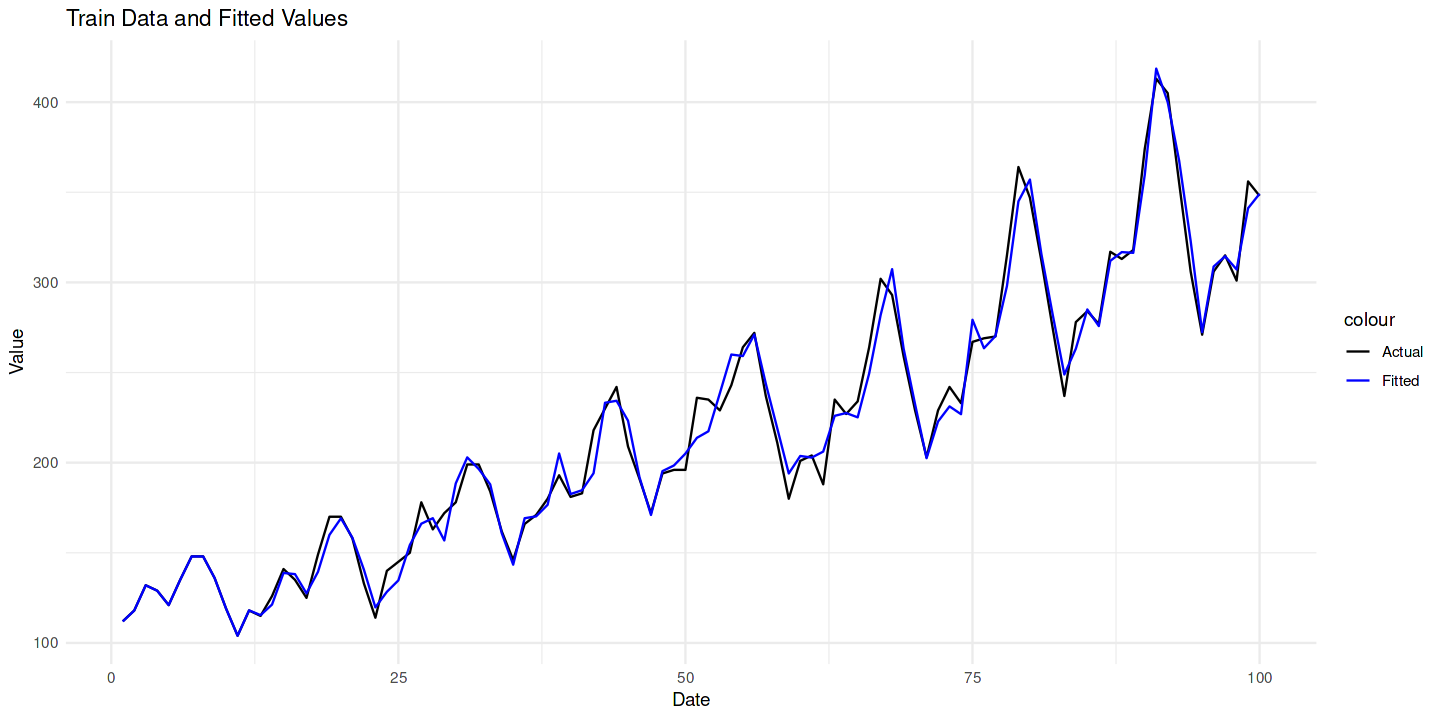

In [35]:
plot_data <- data.frame(
  Date = time(train_ts),
  Actual = as.numeric(train_ts),
  Fitted = as.numeric(train_prediction)
)

# Plot using ggplot2
ggplot(plot_data, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Fitted, color = "Fitted")) +
  labs(title = "Train Data and Fitted Values",
       x = "Date", y = "Value") +
  scale_color_manual(values = c("Actual" = "black", "Fitted" = "blue")) +
  theme_minimal()

In [36]:
df_ts <- ts(df$value, frequency = 12)

In [37]:
start_index <- length(train_ts) + 1
end_index <- length(df_ts)

# Generate predictions
prediction <- forecast(sarima_model, h = (end_index - start_index + 1))

# Rename the predictions
prediction_df <- data.frame(prediction = as.numeric(prediction$mean))

# Optional: add index for plotting
prediction_df$Date <- time(df_ts)[start_index:end_index]

# View the prediction
print(prediction_df)

   prediction      Date
1    354.8903  9.333333
2    407.3606  9.416667
3    449.7381  9.500000
4    439.0618  9.583333
5    392.4451  9.666667
6    345.2100  9.750000
7    309.6340  9.833333
8    346.1863  9.916667
9    354.4331 10.000000
10   341.8729 10.083333
11   394.0314 10.166667
12   386.6584 10.250000
13   393.2868 10.333333
14   446.7772 10.416667
15   488.1921 10.500000
16   478.3095 10.583333
17   430.5858 10.666667
18   382.6824 10.750000
19   347.2797 10.833333
20   383.3484 10.916667
21   391.8323 11.000000
22   378.7832 11.083333
23   431.9402 11.166667
24   424.3273 11.250000
25   431.0621 11.333333
26   484.2466 11.416667
27   525.9515 11.500000
28   515.8328 11.583333
29   468.4285 11.666667
30   420.7100 11.750000
31   385.2560 11.833333
32   421.4663 11.916667
33   429.8810 12.000000
34   416.9714 12.083333
35   469.8463 12.166667
36   462.2996 12.250000
37   469.0055 12.333333
38   522.2807 12.416667
39   563.8997 12.500000
40   553.8512 12.583333
41   506.3511 12

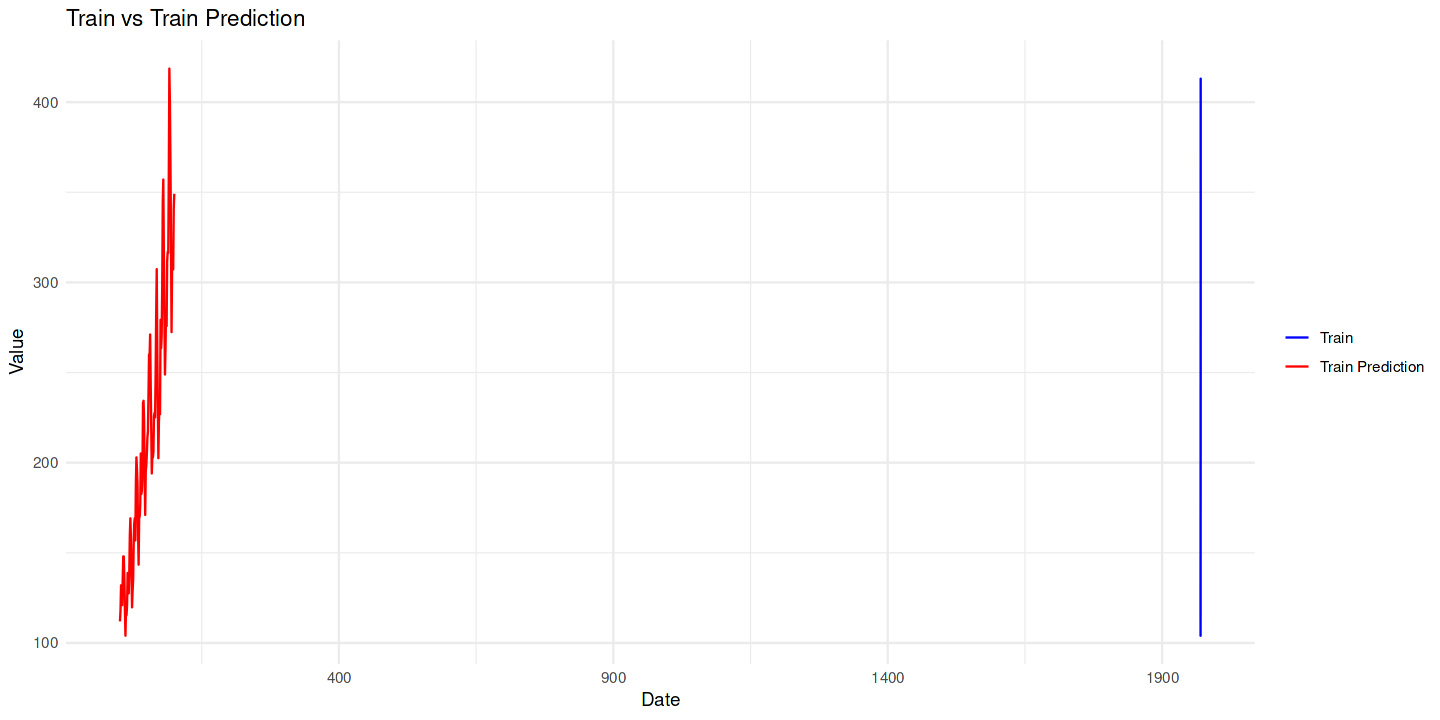

In [38]:
# Convert train_ts to a data frame
train_df <- data.frame(
  Date = as.Date(time(train_ts), origin = "1970-01-01"),  # Extract time index and convert to Date
  Value = as.numeric(train_ts),  # Convert ts object to numeric values
  Type = "Train"
)

# Ensure that train_prediction has compatible time indices
train_prediction_df <- data.frame(
  Date = as.Date(time(train_prediction), origin = "1970-01-01"),  # Extract time index from train_prediction and convert to Date
  Value = as.numeric(train_prediction),  # Convert ts object to numeric values
  Type = "Train Prediction"
)

# Combine both data frames
plot_data <- rbind(train_df, train_prediction_df)

# Plot using ggplot2
ggplot(plot_data, aes(x = Date, y = Value, color = Type)) +
  geom_line() +
  labs(title = "Train vs Train Prediction",
       x = "Date", y = "Value") +
  scale_color_manual(values = c("Train" = "blue", "Train Prediction" = "red")) +
  theme_minimal() + 
  theme(legend.title = element_blank())

Congratulations on reaching the end of this worksheet! I hope you enjoyed it, and have an understanding of how practical time series analysis works.

Some advanced concepts for you to explore are listed below:

* One of the main errors of dealing with time-series data includes preventing lookahead. It’s extremely
important that you aren’t looking at future values to predict earlier ones. You can read more about it
here: https://bowtiedraptor.substack.com/p/look-ahead-bias-and-how-to-prevent
* Although the dataset provided to you for this worksheet was cleaned prior, real world data is extremely
dirty. Time series data especially tends to contain quite a few missing values. Try to explore some
ways of taking care of missing values in data. Some techniques include imputation, forward fills,
interpolation, moving averages, etc.
* Understanding some Classical Machine Learning techniques for Time Series Forecasting, such as Decision
Trees, Forests, Feed-forward Neural Networks, etc.
https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ \
https://www.section.io/engineering-education/feedforward-and-recurrent-neural-networks-pythonimplementation/